In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns


In [2]:
df = pd.read_csv("../Data/crude-oil-price.csv")
print(df.head())

                        date  price  percentChange  change
0  1983-06-01 00:00:00+00:00  31.38            NaN     NaN
1  1983-07-01 00:00:00+00:00  32.00          1.976    0.62
2  1983-08-01 00:00:00+00:00  31.59         -1.281   -0.41
3  1983-09-01 00:00:00+00:00  30.36         -3.894   -1.23
4  1983-10-01 00:00:00+00:00  30.37          0.033    0.01


In [3]:
# Verify columns and data types
print(df.columns)
print(df.dtypes)

Index(['date', 'price', 'percentChange', 'change'], dtype='object')
date              object
price            float64
percentChange    float64
change           float64
dtype: object


In [4]:
# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])
df['price'] = df['price'].astype(float)

In [5]:
summary_stats = df.describe()
print(summary_stats)

            price  percentChange      change
count  494.000000     493.000000  493.000000
mean    46.325888       0.737925    0.105974
std     29.083015      10.512494    4.973496
min     10.420000     -54.245000  -32.830000
25%     20.420000      -5.332000   -1.720000
50%     33.685000       0.929000    0.270000
75%     69.322500       6.377000    2.400000
max    140.000000      88.376000   16.650000


Data Preprocessing

In [6]:
print(df.isnull().sum())

# Impute missing values in 'percentChange' and 'change' columns with 0
df['percentChange'] = df['percentChange'].fillna(0)
df['change'] = df['change'].fillna(0)

date             0
price            0
percentChange    1
change           1
dtype: int64


In [7]:
#  Outliers Detection and Treatment
# Detect outliers using the IQR method
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [8]:
# Identify outliers
outliers = df['price'][(df['price'] < lower_bound) | (df['price'] > upper_bound)]
print('Outliers:', outliers)

# Replace outliers with the upper and lower bounds
df['price'] = np.clip(df['price'], lower_bound, upper_bound)

Outliers: Series([], Name: price, dtype: float64)


In [9]:
# Data Consistency
# Check for duplicate entries and remove them
df.drop_duplicates(inplace=True)

In [10]:
#  Noise Reduction
# Smooth the data using a moving average
df['price_ma'] = df['price'].rolling(window=3).mean()


In [11]:
# Data Integrity
# Verify that dates are in sequence and there are no gaps in the time series
# Check for gaps in the date sequence
df['date'] = pd.to_datetime(df['date']) 
gaps = df['date'].diff() != pd.Timedelta(days=30)
print('Gaps in date sequence:', gaps.sum())

Gaps in date sequence: 329


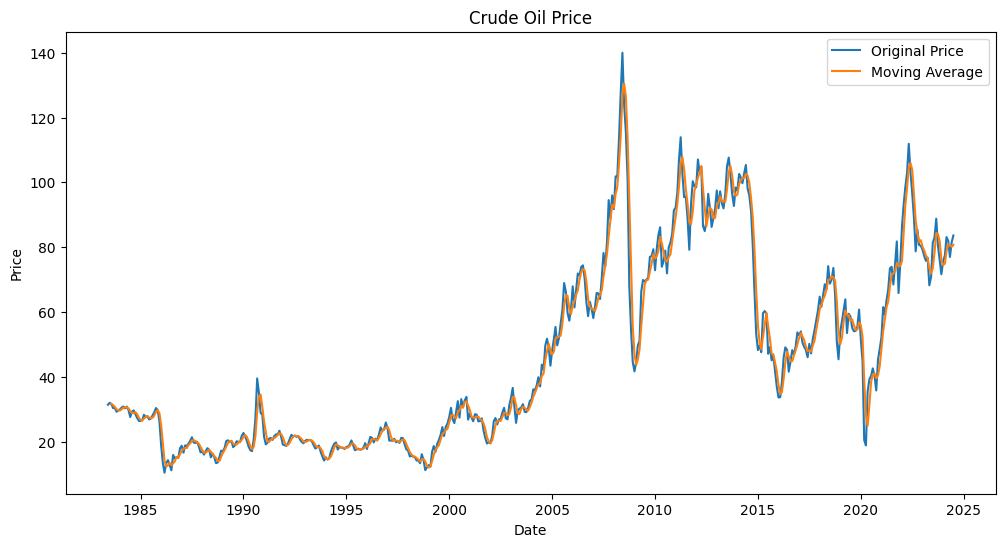

In [12]:
# Visualize the data
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['price'], label='Original Price')
plt.plot(df['date'], df['price_ma'], label='Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Crude Oil Price')
plt.legend()
plt.show()

EDA

In [13]:
# Descriptive Statistics
print("Descriptive Statistics:")
print(df['price'].describe())


Descriptive Statistics:
count    494.000000
mean      46.325888
std       29.083015
min       10.420000
25%       20.420000
50%       33.685000
75%       69.322500
max      140.000000
Name: price, dtype: float64


In [14]:
# Mean
mean_price = df['price'].mean()
print(f"Mean: {mean_price}")

# Median
median_price = df['price'].median()
print(f"Median: {median_price}")

# Mode
mode_price = df['price'].mode()[0]
print(f"Mode: {mode_price}")

Mean: 46.32588805668016
Median: 33.685
Mode: 18.83


In [15]:
# Standard Deviation
std_price = df['price'].std()
print(f"Standard Deviation: {std_price}")

# Skewness
skew_price = df['price'].skew()
print(f"Skewness: {skew_price}")

# Kurtosis
kurt_price = df['price'].kurt()
print(f"Kurtosis: {kurt_price}")

Standard Deviation: 29.08301502445537
Skewness: 0.7167300700887315
Kurtosis: -0.6680572257188069


 Visual Analysis

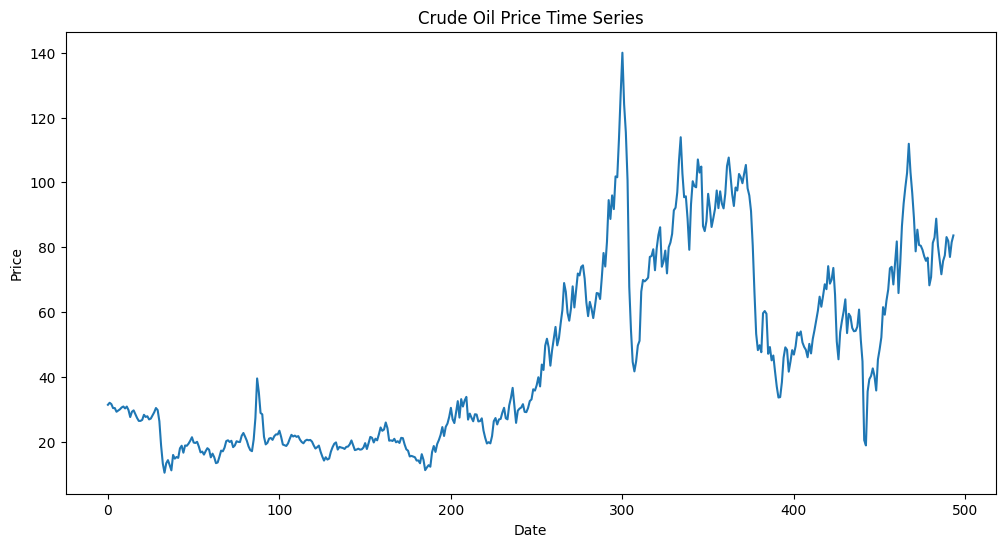

In [16]:
# Time Series Plot
plt.figure(figsize=(12, 6))
plt.plot(df['price'])
plt.title('Crude Oil Price Time Series')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

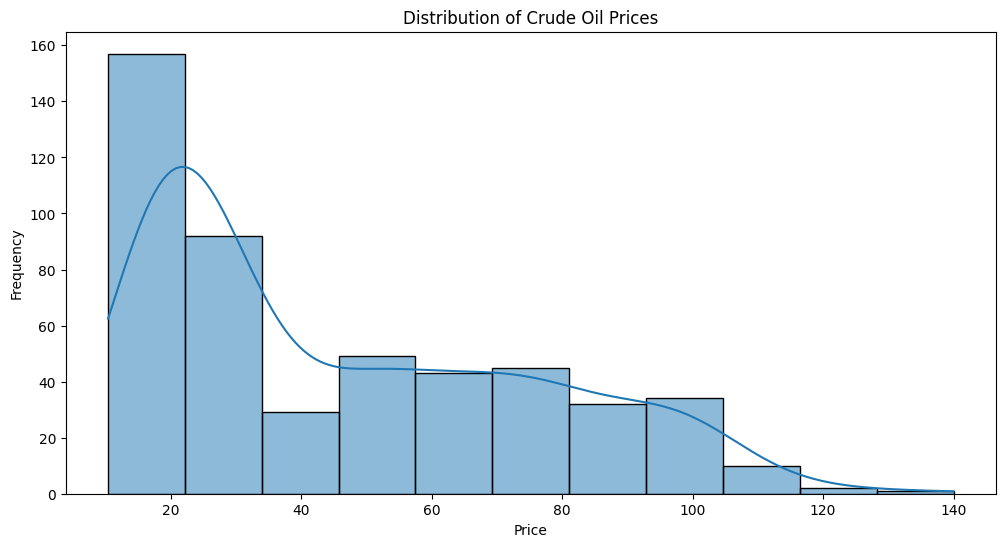

In [17]:
# Histogram and Density Plot
plt.figure(figsize=(12, 6))
sns.histplot(df['price'], kde=True)
plt.title('Distribution of Crude Oil Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

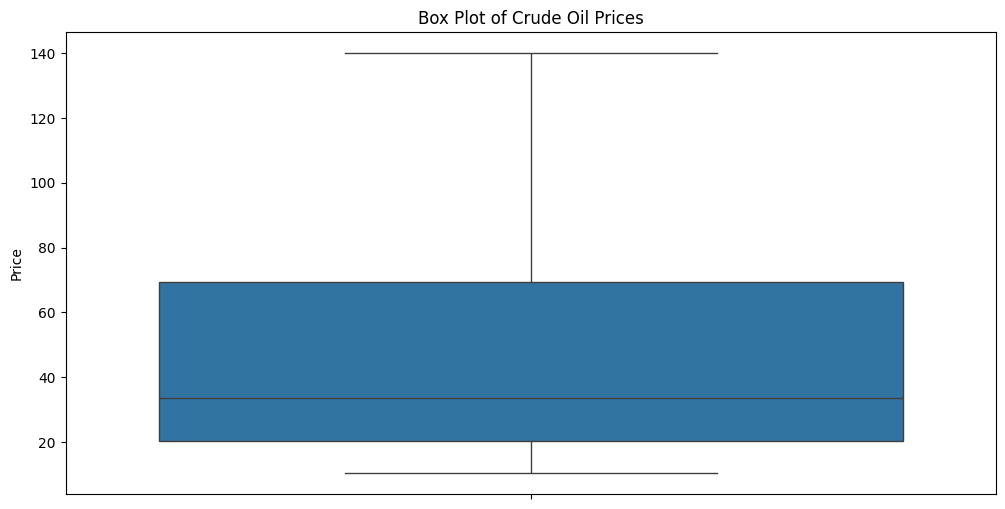

In [18]:
# Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(y=df['price'])
plt.title('Box Plot of Crude Oil Prices')
plt.ylabel('Price')
plt.show()

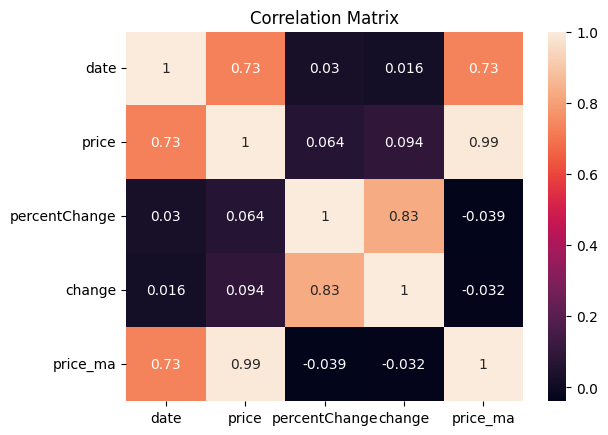

In [19]:
# Correlation Analysis

# Correlation Matrix
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()


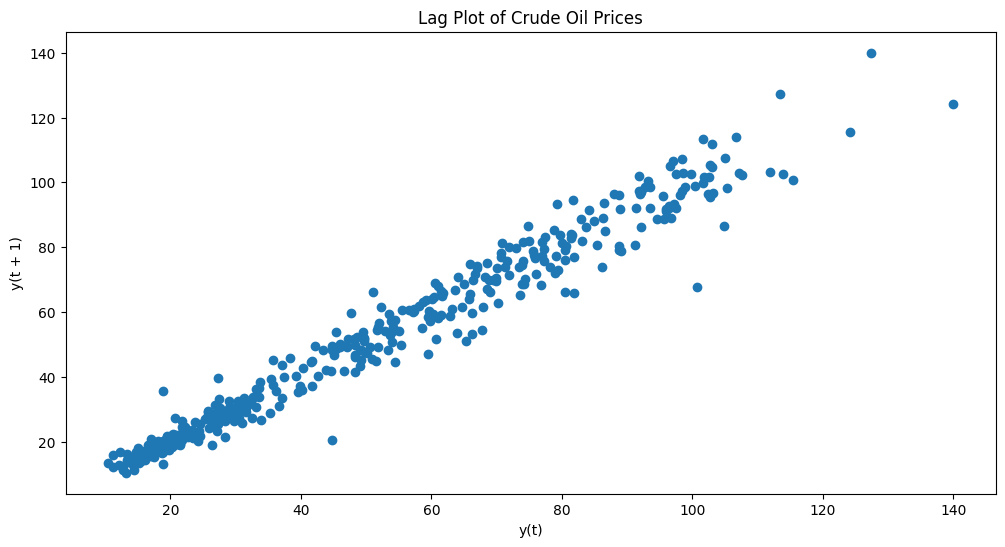

In [20]:
# Lag Plot
plt.figure(figsize=(12, 6))
pd.plotting.lag_plot(df['price'], lag=1)
plt.title('Lag Plot of Crude Oil Prices')
plt.show()

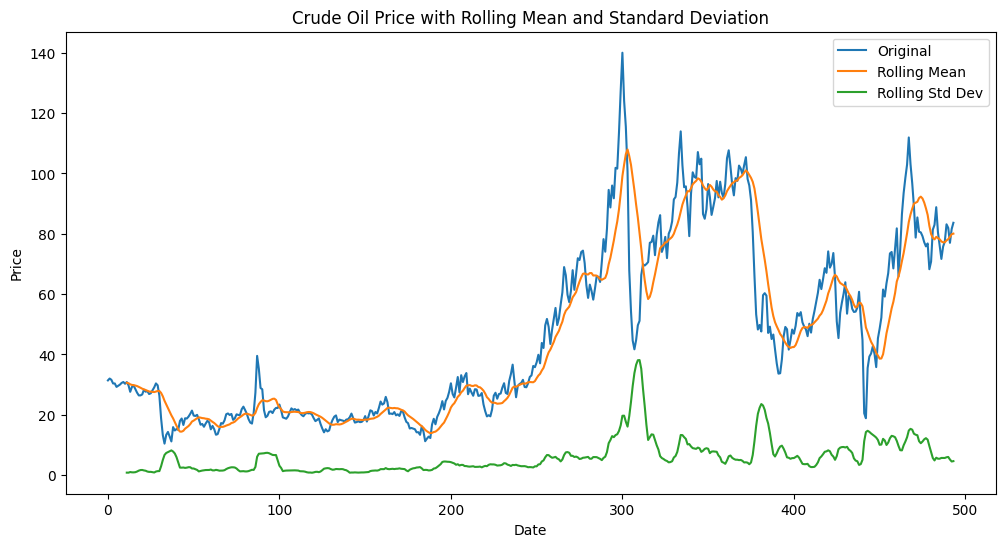

In [21]:
# Rolling Mean and Standard Deviation
plt.figure(figsize=(12, 6))
plt.plot(df['price'], label='Original')
plt.plot(df['price'].rolling(window=12).mean(), label='Rolling Mean')
plt.plot(df['price'].rolling(window=12).std(), label='Rolling Std Dev')
plt.legend()
plt.title('Crude Oil Price with Rolling Mean and Standard Deviation')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

 Feature Engineering

In [22]:
# Seasonal Indicators
# Create features for month, quarter, year, and day of the week
# Set the 'date' column as the index
df = df.set_index('date')
df['month'] = df.index.month
df['quarter'] = df.index.quarter
df['year'] = df.index.year
df['dayofweek'] = df.index.dayofweek

In [23]:
# Print the first few rows of the transformed dataframe
print(df.head())

                           price  percentChange  change   price_ma  month  \
date                                                                        
1983-06-01 00:00:00+00:00  31.38          0.000    0.00        NaN      6   
1983-07-01 00:00:00+00:00  32.00          1.976    0.62        NaN      7   
1983-08-01 00:00:00+00:00  31.59         -1.281   -0.41  31.656667      8   
1983-09-01 00:00:00+00:00  30.36         -3.894   -1.23  31.316667      9   
1983-10-01 00:00:00+00:00  30.37          0.033    0.01  30.773333     10   

                           quarter  year  dayofweek  
date                                                 
1983-06-01 00:00:00+00:00        2  1983          2  
1983-07-01 00:00:00+00:00        3  1983          4  
1983-08-01 00:00:00+00:00        3  1983          0  
1983-09-01 00:00:00+00:00        3  1983          3  
1983-10-01 00:00:00+00:00        4  1983          5  


In [24]:
df.to_csv('../data/crude-oil-Cleaned.csv', index=False)

In [26]:
df.dtypes

price            float64
percentChange    float64
change           float64
price_ma         float64
month              int32
quarter            int32
year               int32
dayofweek          int32
dtype: object